In [2]:
# Import Libraries
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as ols
import matplotlib.pyplot as plt

In [4]:
# Read and Inspect Data

# Read data
crimeData = pd.read_csv(r"C:\Users\noman\My Drive\ABP\ABP DSBA Batch 03\Unit 02\Session 03_LogRegContd_Rcode_decision tree\uscrime.txt", sep="\t", decimal=".")
# Display structure and first few rows of the dataframe
print(crimeData.info())
print(crimeData.head())

# Glimpse of the data (similar to str() and glimpse() in R)
crimeData.info()

# Check for any NA values
print(crimeData.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       47 non-null     float64
 1   So      47 non-null     int64  
 2   Ed      47 non-null     float64
 3   Po1     47 non-null     float64
 4   Po2     47 non-null     float64
 5   LF      47 non-null     float64
 6   M.F     47 non-null     float64
 7   Pop     47 non-null     int64  
 8   NW      47 non-null     float64
 9   U1      47 non-null     float64
 10  U2      47 non-null     float64
 11  Wealth  47 non-null     int64  
 12  Ineq    47 non-null     float64
 13  Prob    47 non-null     float64
 14  Time    47 non-null     float64
 15  Crime   47 non-null     int64  
dtypes: float64(12), int64(4)
memory usage: 6.0 KB
None
      M  So    Ed   Po1   Po2     LF    M.F  Pop    NW     U1   U2  Wealth  \
0  15.1   1   9.1   5.8   5.6  0.510   95.0   33  30.1  0.108  4.1    3940   
1  14.3   0  11.3  

In [7]:
# Linear Regression Model
crimeData.rename(columns={'M.F': 'M_F'}, inplace=True)

# Define the model
formula = 'Crime ~ M + So + Ed + Po1 + Po2 + LF + M_F + Pop + NW + U1 + U2 + Wealth + Ineq + Prob + Time'
lm_crimeData = ols.ols(formula, data=crimeData).fit()

# Summary of the model
print(lm_crimeData.summary())

# 95% Confidence Intervals for the Model Parameters
print(lm_crimeData.conf_int(0.05))

                            OLS Regression Results                            
Dep. Variable:                  Crime   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     8.429
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           3.54e-07
Time:                        07:46:32   Log-Likelihood:                -308.01
No. Observations:                  47   AIC:                             648.0
Df Residuals:                      31   BIC:                             677.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5984.2876   1628.318     -3.675      0.0

In [8]:
# Making Predictions

# Prepare a new data frame for predictions
new_data = pd.DataFrame({'M': [14.0], 'So': [0], 'Ed': [10.0], 'Po1': [12.0], 'Po2': [15.5], 'LF': [0.640], 
                         'M_F': [94.0], 'Pop': [150], 'NW': [1.1], 'U1': [0.120], 'U2': [3.6], 'Wealth': [3200], 
                         'Ineq': [20.1], 'Prob': [0.04], 'Time': [39.0]})

# Predict using the new data frame
predictions = lm_crimeData.get_prediction(new_data)
print(predictions.summary_frame(alpha=0.05))  # Confidence interval

# Add predicted values and residuals to the original dataframe
crimeData['a_pred'] = lm_crimeData.fittedvalues
crimeData['a_res'] = lm_crimeData.resid

         mean     mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  155.434897  718.559197   -1310.076247     1620.94604  -1370.845244   

   obs_ci_upper  
0   1681.715038  


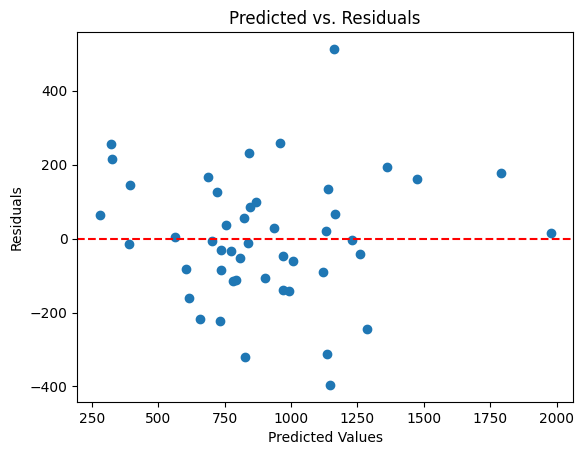

In [9]:
# Plotting Predicted Values vs. Residuals


plt.scatter(crimeData['a_pred'], crimeData['a_res'])
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Predicted vs. Residuals')
plt.show()

In [10]:
# Analysis of Variance (ANOVA)

from statsmodels.stats.anova import anova_lm

# Perform ANOVA and print the table
anova_results = anova_lm(lm_crimeData)
print(anova_results)

            df        sum_sq       mean_sq          F        PR(>F)
M          1.0  5.508396e+04  5.508396e+04   1.260274  2.702190e-01
So         1.0  1.537012e+04  1.537012e+04   0.351655  5.574794e-01
Ed         1.0  9.056676e+05  9.056676e+05  20.720899  7.722052e-05
Po1        1.0  3.076033e+06  3.076033e+06  70.377013  1.780039e-09
Po2        1.0  1.530239e+05  1.530239e+05   3.501055  7.079472e-02
LF         1.0  6.113390e+04  6.113390e+04   1.398691  2.459344e-01
M_F        1.0  1.109996e+05  1.109996e+05   2.539575  1.211712e-01
Pop        1.0  4.264905e+04  4.264905e+04   0.975774  3.308922e-01
NW         1.0  1.419734e+04  1.419734e+04   0.324823  5.728311e-01
U1         1.0  7.065404e+03  7.065404e+03   0.161650  6.904003e-01
U2         1.0  2.696628e+05  2.696628e+05   6.169655  1.860750e-02
Wealth     1.0  3.474756e+04  3.474756e+04   0.794994  3.794629e-01
Ineq       1.0  5.474230e+05  5.474230e+05  12.524570  1.290546e-03
Prob       1.0  2.226203e+05  2.226203e+05   5.0

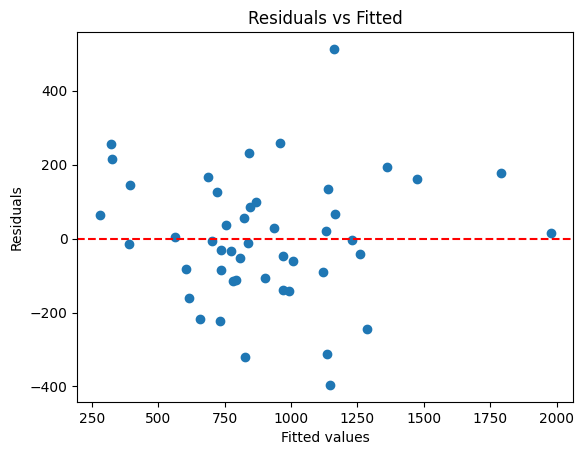

In [12]:
# Plotting the Linear Model (Diagnostic Plots)

# 1. Residuals vs Fitted Values

# Used to check the assumption of linearity and homoscedasticity (constant variance of residuals).


import matplotlib.pyplot as plt
import statsmodels.api as sm

fitted_values = lm_crimeData.fittedvalues
residuals = lm_crimeData.resid

plt.scatter(fitted_values, residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

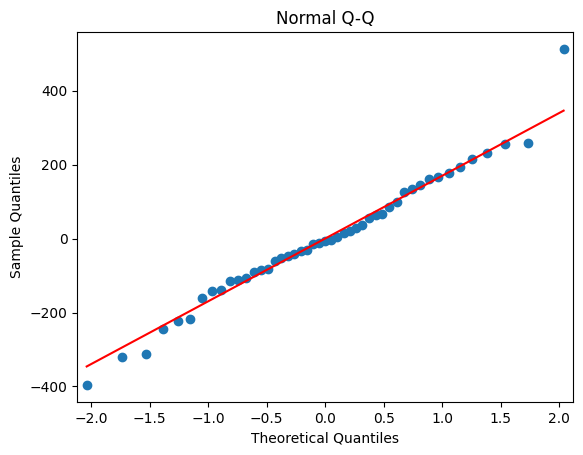

In [13]:
# 2. Q-Q Plot of Residuals

# Used to check the normality of residuals.


from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s')
plt.title('Normal Q-Q')
plt.show()

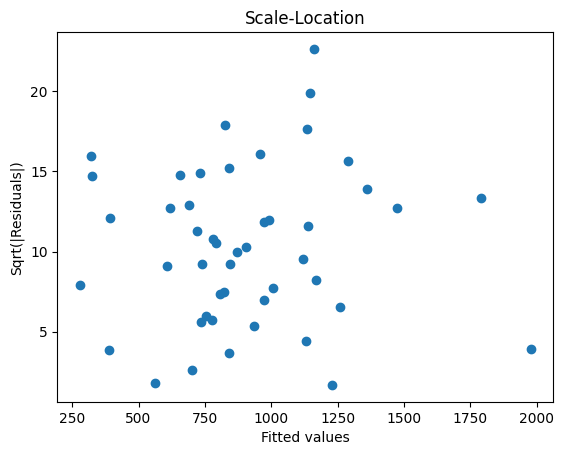

In [14]:
# 3. Scale-Location Plot

# Used to check the assumption of homoscedasticity.

import numpy as np

plt.scatter(fitted_values, np.sqrt(np.abs(residuals)))
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(|Residuals|)')
plt.title('Scale-Location')
plt.show()

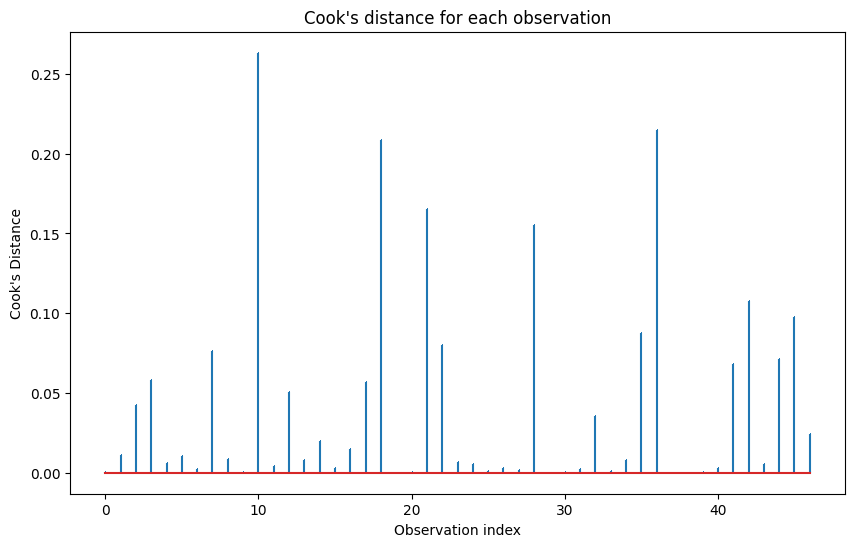

In [15]:
# 4. Cook's Distance Plot

# Used to identify influential cases.

from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(lm_crimeData)
cooks = influence.cooks_distance[0]

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks)), cooks, markerfmt=",")
plt.title("Cook's distance for each observation")
plt.xlabel('Observation index')
plt.ylabel("Cook's Distance")
plt.show()

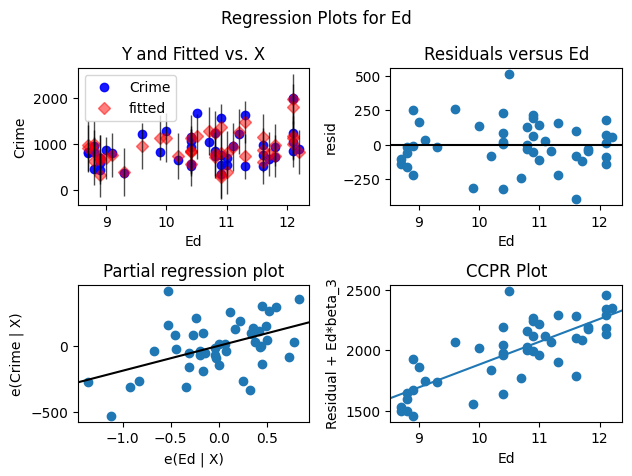

In [16]:
# Combining Multiple Plots

# Statsmodels also includes a more comprehensive diagnostics plotting function, plot_regress_exog(), for a given explanatory variable. This function generates four plots in a 2x2 grid: Residuals vs that variable, the variable vs Fitted values, a partial regression plot, and a CCPR plot (Component-Component plus Residual).

# Example for the 'Ed' variable
fig = sm.graphics.plot_regress_exog(lm_crimeData, 'Ed')
fig.tight_layout(pad=1.0)